# Instant AR – How to get going in just few Hour

Simple AR app using openCV and object detection technique:

### AR Application -  - Putting it all together###

Steps -
* Open Webcam
* Load object to be identified
* Detect object using ORB 
* Overlay Text upon identification
* Ctrl+C to stop the camera

In [1]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

import cv2
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython import display

from pylab import rcParams
rcParams['axes.xmargin'] = 0
rcParams['axes.ymargin'] = 0
rcParams['figure.figsize'] = (14,6)

### ORB Feature Detection Funtion

We have to create an ORB object with the function, cv2.ORB() or using feature2d common interface. 
This function will take object and camera frame as an input and will overlya "Hello AR" upon identification of object at coordinateds provided by X and Y

In [2]:
def ORB_Detector(input1, input2, x, y):
    #Convert to gray scale
    obj = cv2.cvtColor(input1, cv2.COLOR_BGR2GRAY)
    scn = cv2.cvtColor(input2, cv2.COLOR_BGR2GRAY)
    
    #Create ORB detector, 1000 keypoints, scaling pyramid factor 1.2
    orb_Detector = cv2.ORB_create()
    
    #Detect keypoint of input image (from camera)
    (keypoint1, descriptor1) = orb_Detector.detectAndCompute(obj, None)
    
    #Detect keypoint of original image (from source)
    (keypoint2, descriptor2) = orb_Detector.detectAndCompute(scn, None)
    
    #Create a matcher (to match 2 keypoints)
    matcher = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
    
    #Matching
    matches = matcher.match(descriptor1, descriptor2)
     # Sort them in the order of their distance.
    matches = sorted(matches, key = lambda x:x.distance)
    
    ## extract the matched keypoints
    src_pts  = np.float32([keypoint1[m.queryIdx].pt for m in matches]).reshape(-1,1,2)
    dst_pts  = np.float32([keypoint2[m.trainIdx].pt for m in matches]).reshape(-1,1,2)
    
    ## find homography matrix and do perspective transform
    M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC,5.0)
        
    #create blank overlay image and add overlay item to it
    h1,w1 = obj.shape[:2]
    overlayImage = np.zeros((h1,w1,4), np.uint8)
    
    textToAnnotate = "Hello AR"
    textColor = (0,255,0,255)
    textFont = cv2.FONT_HERSHEY_DUPLEX
    fontSize = 2
    fontThickness = 2
    cv2.putText(overlayImage,textToAnnotate , (x, y),textFont , 
                                           fontSize, textColor, fontThickness, cv2.LINE_AA)
    #do transformation
    h2,w2 = scn.shape[:2]
    xOverlayImage = cv2.warpPerspective(overlayImage,M,(w2,h2))
    
    #add images
    scn = cv2.cvtColor(input2, cv2.COLOR_RGB2RGBA)
    final = cv2.add(scn,xOverlayImage)

    return final

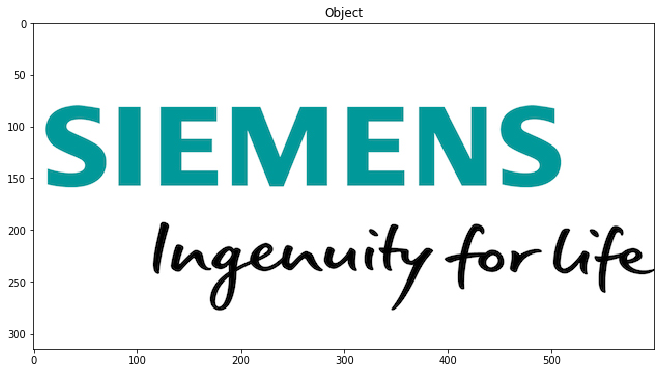

In [3]:
obj = cv2.imread('images/object.png')
obj = cv2.cvtColor(obj, cv2.COLOR_BGR2RGB)

plt.imshow(obj),plt.title('Object')
plt.show()

In [ ]:
%matplotlib inline

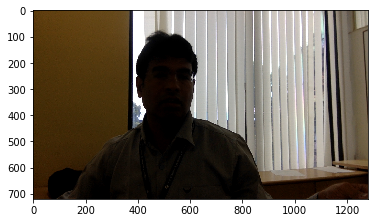

In [ ]:
#open camera
vc = cv2.VideoCapture(0)
orb = cv2.ORB_create()
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

if vc.isOpened(): # try to get the first frame
    is_capturing, frame = vc.read()
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)    # makes the blues image look real colored
    webcam_preview = plt.imshow(frame) 
    
else:
    is_capturing = False

while is_capturing:
    try:    # Lookout for a keyboardInterrupt to stop the script
        is_capturing, frame = vc.read()
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)    # makes the blues image look real colored
        final = ORB_Detector(obj, frame , 100, 200)
        
        webcam_preview.set_data(final)
        plt.draw()
        display.clear_output(wait=True)
        display.display(plt.gcf())
        plt.pause(0.05)    # the pause time is = 1 / framerate
    except KeyboardInterrupt:
        vc.release()

In [ ]:
print('The end!')